<a href="https://colab.research.google.com/github/fabiobrabo/FGV_Sol_Min_Dados/blob/main/FGV_Minera%C3%A7%C3%A3o_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho da Disciplina **Soluções de Mineração de Dados**

**Alunos:**

* CASSIANO RICARDO ERHARDT 
* FÁBIO OLIVEIRA GUIMARÃES 
* FELIPE DE MELO ROSA 
* MÁRCIO MILESKI
* MÁRCIO ROBERTO REGOS RANSOLIM 
* NILSON CESAR JUNIOR 
* WANDERSON LANGAMER DA ROCHA



# **Problema de Negócio**

Este trabalho visa resolver um problema de negócio utilizando regras de Cluster Particional. A base escolhida foi **South German Credit** presente no Datasets da UCI¹. O problema é identificar o padrão dos clientes bons e mals pagadores.

¹*https://archive.ics.uci.edu/ml/datasets/South+German+Credit*

A base **South German Credit** tem 1000 registros com 21 variáveis, sendo 20 

***Apresentar pergunta de negócio ou análise exploratória de negócio;***

# Campos do Dataset

**1. laufkont = status**
* 1 : no checking account
* 2 : … < 0 DM
* 3 : 0<= … < 200 DM
* 4 : … >= 200 DM / salary for at least 1 year

**2. laufzeit = duration**

**3. moral = credit_history**
* 0 : delay in paying off in the past
* 1 : critical account/other credits elsewhere
* 2 : no credits taken/all credits paid back duly
* 3 : existing credits paid back duly till now
* 4 : all credits at this bank paid back duly

**4. verw = purpose**
* 0 : others
* 1 : car (new)
* 2 : car (used)
* 3 : furniture/equipment
* 4 : radio/television
* 5 : domestic appliances
* 6 : repairs
* 7 : education
* 8 : vacation
* 9 : retraining
* 10 : business

**5. hoehe = amount**

**6. sparkont = savings**
* 1 : unknown/no savings account
* 2 : … < 100 DM
* 3 : 100 <= … < 500 DM
* 4 : 500 <= … < 1000 DM
* 5 : … >= 1000 DM

**7. beszeit = employment_duration**
* 1 : unemployed
* 2 : < 1 yr
* 3 : 1 <= … < 4 yrs
* 4 : 4 <= … < 7 yrs
* 5 : >= 7 yrs

**8. rate = installment_rate**
* 1 : >= 35
* 2 : 25 <= … < 35
* 3 : 20 <= … < 25
* 4 : < 20

**9. famges = personalstatussex**
* 1 : male : divorced/separated
* 2 : female : non-single or male : single
* 3 : male : married/widowed
* 4 : female : single

**10. buerge = other_debtors**
* 1 : none
* 2 : co-applicant
* 3 : guarantor

**11. wohnzeit = present_residence**
* 1 : < 1 yr
* 2 : 1 <= … < 4 yrs
* 3 : 4 <= … < 7 yrs
* 4 : >= 7 yrs

**12. verm = property**
* 1 : unknown / no property
* 2 : car or other
* 3 : building soc. savings agr./life insurance
* 4 : real estate

**13. alter = age**

**14. weitkred = otherinstallmentplans**
1 : bank
2 : stores
3 : none

**15. wohn = housing**
* 1 : for free
* 2 : rent
* 3 : own

**16. bishkred = number_credits**
* 1 : 1
* 2 : 2-3
* 3 : 4-5
* 4 : >= 6

**17. beruf = job**
* 1 : unemployed/unskilled - non-resident
* 2 : unskilled - resident
* 3 : skilled employee/official
* 4 : manager/self-empl./highly qualif. employee

**18. pers = people_liable**
* 1 : 3 or more
* 2 : 0 to 2

**19. telef = telephone**
* 1 : no
* 2 : yes (under customer name)

**20. gastarb = foreign_worker**
* 1 : yes
* 2 : no

**21. kredit (target column) = credit_risk**
* 0 : bad
* 1 : good

In [40]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

In [41]:
#importando os dados

dataset = pd.read_csv("https://raw.githubusercontent.com/fabiobrabo/FGV_Sol_Min_Dados/main/SouthGermanCredit.csv")


In [42]:
# Dados importados

dataset.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


# Análise exploratória do dados

In [43]:
# Explorando os dados
# Os atributos "laufzeit", "hoehe" e "alter" são mais espaçadas

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
laufkont,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
laufzeit,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
moral,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
verw,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
hoehe,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
sparkont,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
beszeit,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
famges,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
buerge,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


In [44]:
# Base sem nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


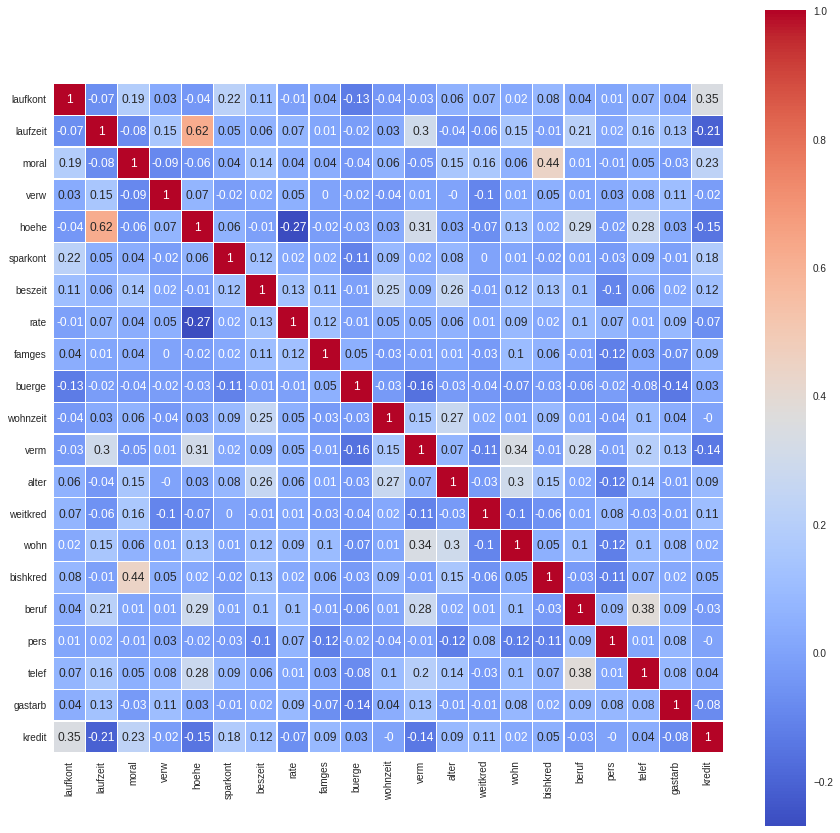

In [45]:
# Avaliando a correlação entre os atributos do dataset
# Não há, aparentemente, uma correlação forte entre os atributos, apenas entre "laufzeit" e "hoehe" que é de 62%
plt.figure(figsize=(15,15)) 
sns.heatmap(data=round(dataset.corr(),2),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

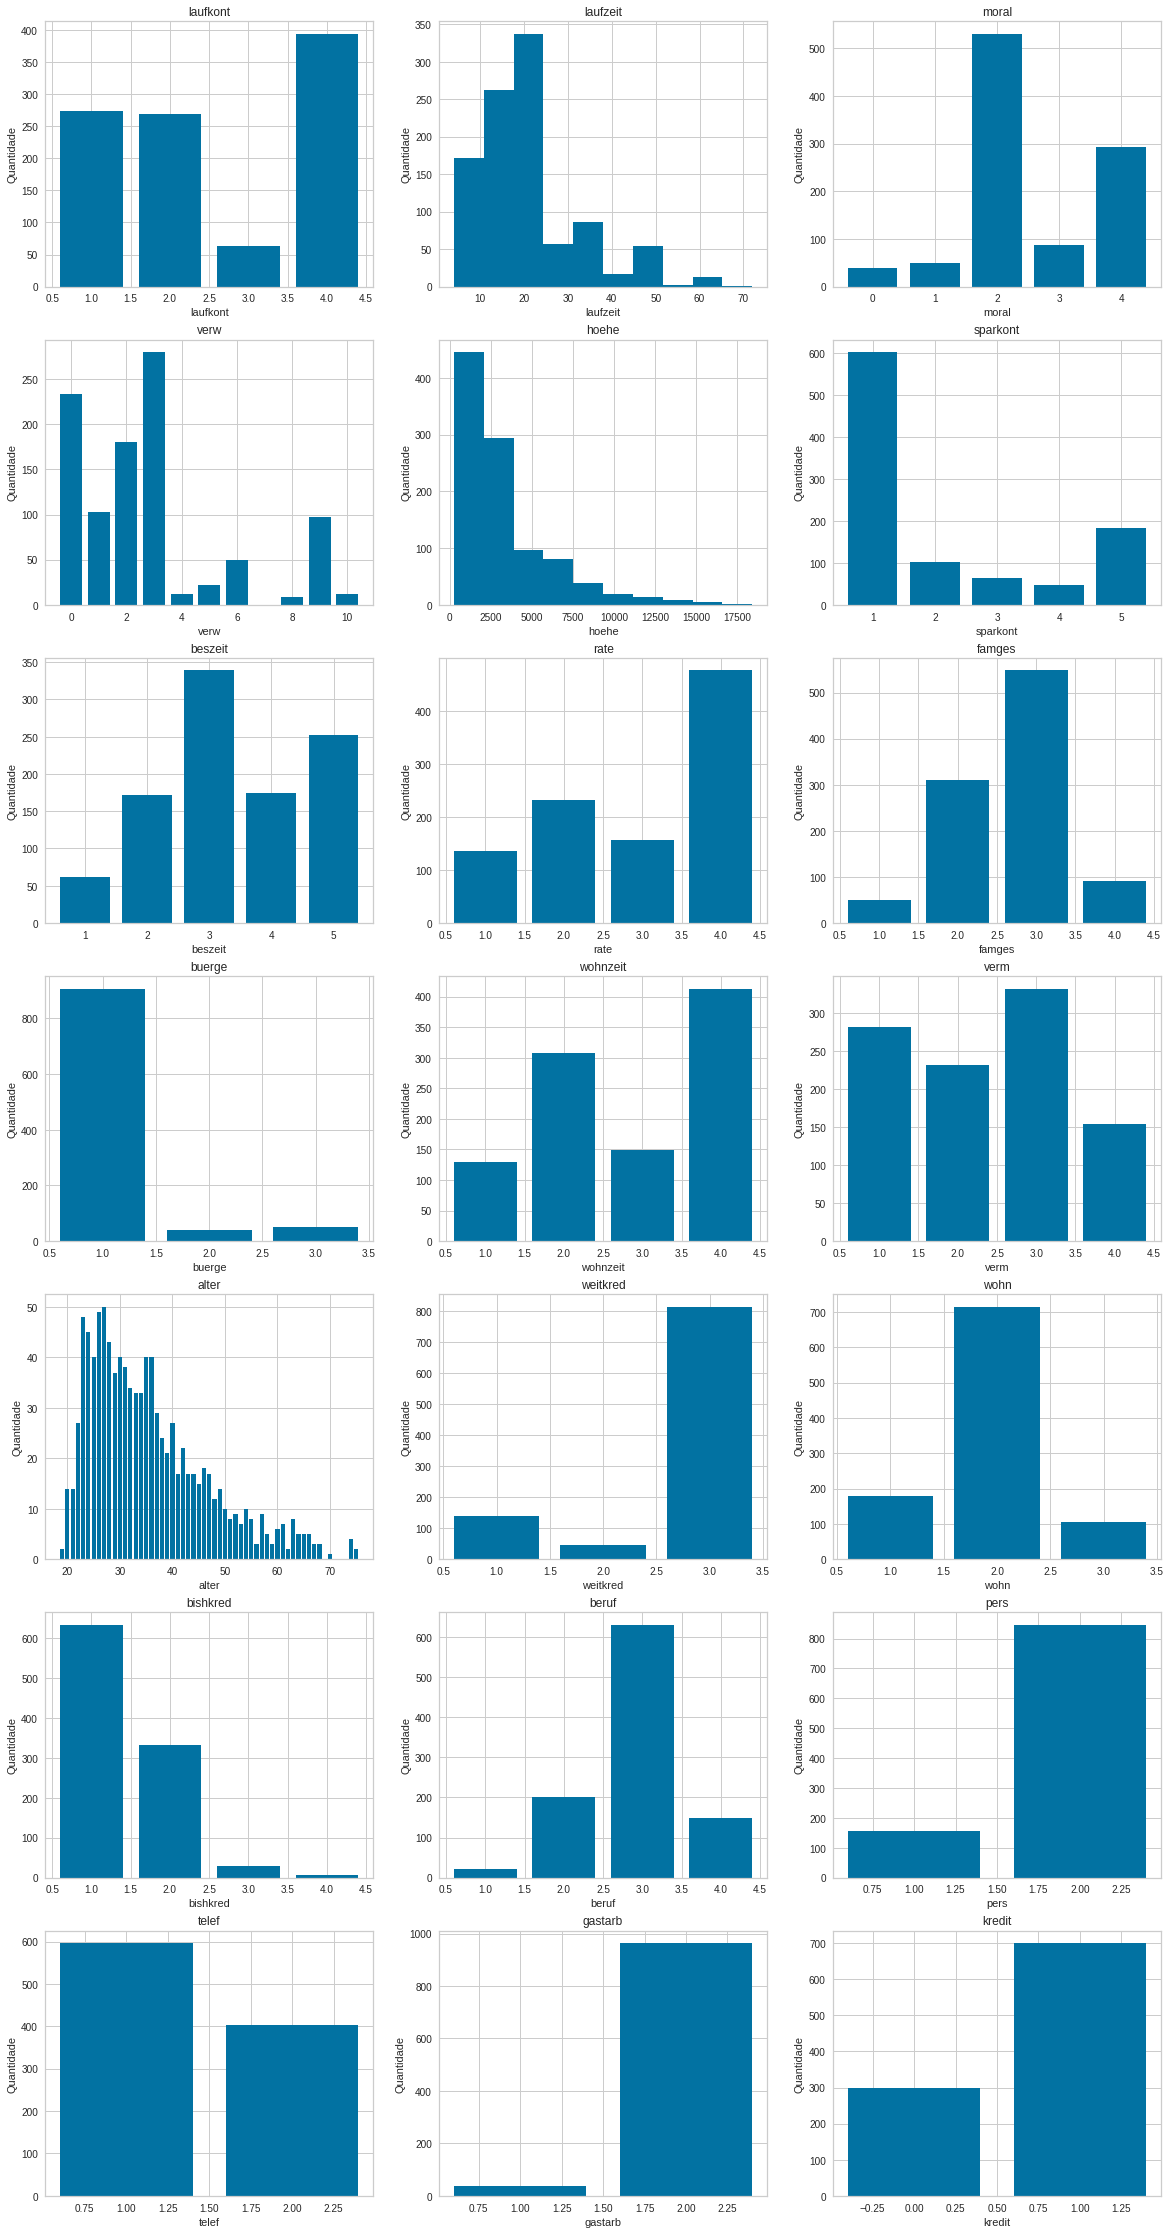

In [46]:
# Plotando Gráficos

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (20,40)
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12], [ax13, ax14, ax15], [ax16, ax17, ax18], [ax19, ax20, ax21]] = plt.subplots(nrows=7, ncols=3, figsize=(20,40))

# Dados para cada subplot
tabela = dataset.groupby(['laufkont'])[('laufkont')].count()
ax1.bar(tabela.index, tabela)

#tabela = dataset.groupby(['laufzeit'])[('laufzeit')].count()
#ax2.bar(tabela.index, tabela)

ax2.hist(dataset['laufzeit'], bins=10)

tabela = dataset.groupby(['moral'])[('moral')].count()
ax3.bar(tabela.index, tabela)

tabela = dataset.groupby(['verw'])[('verw')].count()
ax4.bar(tabela.index, tabela)

#tabela = dataset.groupby(['hoehe'])[('hoehe')].count()
#ax5.bar(tabela.index, tabela)

ax5.hist(dataset['hoehe'], bins=10)

tabela = dataset.groupby(['sparkont'])[('sparkont')].count()
ax6.bar(tabela.index, tabela)

tabela = dataset.groupby(['beszeit'])[('beszeit')].count()
ax7.bar(tabela.index, tabela)

tabela = dataset.groupby(['rate'])[('rate')].count()
ax8.bar(tabela.index, tabela)

tabela = dataset.groupby(['famges'])[('famges')].count()
ax9.bar(tabela.index, tabela)

tabela = dataset.groupby(['buerge'])[('buerge')].count()
ax10.bar(tabela.index, tabela)

tabela = dataset.groupby(['wohnzeit'])[('wohnzeit')].count()
ax11.bar(tabela.index, tabela)

tabela = dataset.groupby(['verm'])[('verm')].count()
ax12.bar(tabela.index, tabela)

tabela = dataset.groupby(['alter'])[('alter')].count()
ax13.bar(tabela.index, tabela)

tabela = dataset.groupby(['weitkred'])[('weitkred')].count()
ax14.bar(tabela.index, tabela)

tabela = dataset.groupby(['wohn'])[('wohn')].count()
ax15.bar(tabela.index, tabela)

tabela = dataset.groupby(['bishkred'])[('bishkred')].count()
ax16.bar(tabela.index, tabela)

tabela = dataset.groupby(['beruf'])[('beruf')].count()
ax17.bar(tabela.index, tabela)

tabela = dataset.groupby(['pers'])[('pers')].count()
ax18.bar(tabela.index, tabela)

tabela = dataset.groupby(['telef'])[('telef')].count()
ax19.bar(tabela.index, tabela)

tabela = dataset.groupby(['gastarb'])[('gastarb')].count()
ax20.bar(tabela.index, tabela)

tabela = dataset.groupby(['kredit'])[('kredit')].count()
ax21.bar(tabela.index, tabela)

ax1.set(title="laufkont", xlabel="laufkont", ylabel="Quantidade")
ax2.set(title="laufzeit", xlabel="laufzeit", ylabel="Quantidade")
ax3.set(title="moral", xlabel="moral", ylabel="Quantidade")
ax4.set(title="verw", xlabel="verw", ylabel="Quantidade")
ax5.set(title="hoehe", xlabel="hoehe", ylabel="Quantidade")
ax6.set(title="sparkont", xlabel="sparkont", ylabel="Quantidade")
ax7.set(title="beszeit", xlabel="beszeit", ylabel="Quantidade")
ax8.set(title="rate", xlabel="rate", ylabel="Quantidade")
ax9.set(title="famges", xlabel="famges", ylabel="Quantidade")
ax10.set(title="buerge", xlabel="buerge", ylabel="Quantidade")
ax11.set(title="wohnzeit", xlabel="wohnzeit", ylabel="Quantidade")
ax12.set(title="verm", xlabel="verm", ylabel="Quantidade")
ax13.set(title="alter", xlabel="alter", ylabel="Quantidade")
ax14.set(title="weitkred", xlabel="weitkred", ylabel="Quantidade")
ax15.set(title="wohn", xlabel="wohn", ylabel="Quantidade")
ax16.set(title="bishkred", xlabel="bishkred", ylabel="Quantidade")
ax17.set(title="beruf", xlabel="beruf", ylabel="Quantidade")
ax18.set(title="pers", xlabel="pers", ylabel="Quantidade")
ax19.set(title="telef", xlabel="telef", ylabel="Quantidade")
ax20.set(title="gastarb", xlabel="gastarb", ylabel="Quantidade")
ax21.set(title="kredit", xlabel="kredit", ylabel="Quantidade")

plt.show()

# Estimar modelos de clustering particional

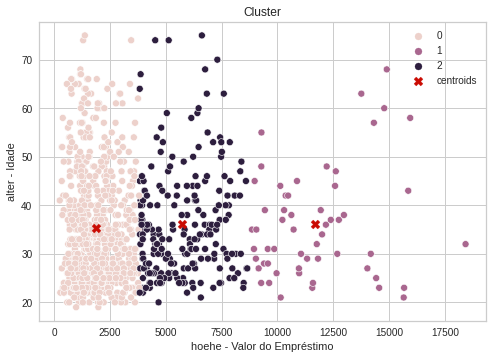

In [47]:
# Estimar modelos de clustering particional

# Ajustando o dataset
#X = dataset.iloc[:,:].values
X = dataset.iloc[:,:]

# Gera Modelo Kmeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0, max_iter = 500)

# Treina o Modelo
pred_y = kmeans.fit_predict(dataset)

# Plota o Gráfico

sns.scatterplot(data=X, x=X['hoehe'], y=X['alter'], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,4], kmeans.cluster_centers_[:,12], 
            marker="X", c="r", s=80, label="centroids")

plt.title("Cluster")
plt.xlabel("hoehe - Valor do Empréstimo")
plt.ylabel("alter - Idade")
plt.legend()
plt.show()


In [48]:
kmeans.labels_
kmeans.inertia_
kmeans.n_iter_
kmeans.cluster_centers_

array([[2.61263736e+00, 1.67184066e+01, 2.56181319e+00, 2.71565934e+00,
        1.89006181e+03, 2.07005495e+00, 3.40109890e+00, 3.12637363e+00,
        2.68269231e+00, 1.15796703e+00, 2.82142857e+00, 2.19093407e+00,
        3.53186813e+01, 2.69230769e+00, 1.88461538e+00, 1.38324176e+00,
        2.81318681e+00, 1.85164835e+00, 1.33516484e+00, 1.95467033e+00,
        7.41758242e-01],
       [2.51785714e+00, 3.96607143e+01, 2.30357143e+00, 3.21428571e+00,
        1.16955893e+04, 2.39285714e+00, 3.33928571e+00, 2.28571429e+00,
        2.64285714e+00, 1.10714286e+00, 2.83928571e+00, 3.25000000e+00,
        3.60535714e+01, 2.53571429e+00, 2.19642857e+00, 1.37500000e+00,
        3.33928571e+00, 1.83928571e+00, 1.82142857e+00, 1.96428571e+00,
        4.46428571e-01],
       [2.47222222e+00, 3.01435185e+01, 2.55092593e+00, 3.10648148e+00,
        5.74226852e+03, 2.14814815e+00, 3.33796296e+00, 2.63425926e+00,
        2.68981481e+00, 1.11111111e+00, 2.92592593e+00, 2.68981481e+00,
        3.6162

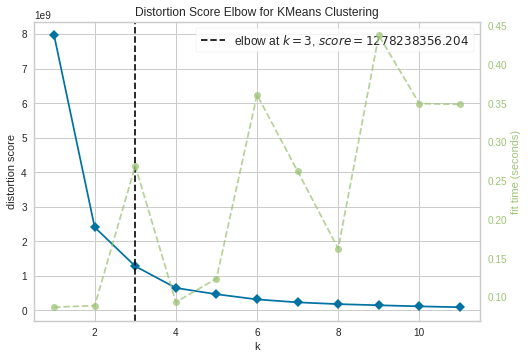

In [49]:
# Verificar pela curva do cotovelo qual é o melhor quantidade de cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(dataset)
visualizer.show()


# Escolher o melhor cluster e justificar

In [50]:
# Escolher o melhor cluster e justificar

X = dataset.drop(['kredit'], axis=1)
y = dataset['kredit']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
cols = fit.get_support(indices=True)
dataset.iloc[:,cols]

,laufkont,laufzeit,moral,sparkont
0,1,18,4,1
1,1,9,4,1
2,2,12,2,2
3,1,12,4,1
4,1,12,4,1
...,...,...,...,...
995,1,24,2,1
996,1,24,2,1
997,4,21,4,5
998,2,12,2,5


In [51]:
from sklearn.ensemble import RandomForestClassifier

# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Score de cada um dos atributos:
print(model.feature_importances_)

X.columns

[0.11683639 0.10717237 0.05079918 0.06439383 0.13121513 0.05022378
 0.04626212 0.04462269 0.03629913 0.01968453 0.03400411 0.03894439
 0.10359725 0.01890649 0.02953664 0.0257685  0.03993194 0.01587348
 0.01994242 0.00598564]


Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb'],
      dtype='object')

# Concluir sobre os resultados e seu impacto na pergunta de negócio do item 1.

A partir de uma seleção de variáveis (Random Forest) determinamos que que as variáveis hoehe, alter, laufzeit e laufkont são as mais significativas, respectivamente. Sendo assim, para plotar o gráfico em duas dimensões definiu-se o hoehe e o alter.
O cluster definido tem 3 centroides